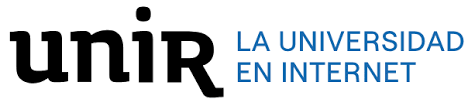

<hr style="border: none; height: 10px; background-color: blue; opacity:60%;">

<h2 style="text-align: center; font-weight: bold;">Asignatura: Percepción Computacional</h2>


<h2 style="text-align: center; font-weight: bold;">Actividad grupal: Evaluación de la segmentación</h2>

<h2 style="text-align: center; font-weight: bold;">Equipo 1073-H:</h2>

<h3 style="text-align: center;">Diego Alexis Galván Sandoval</h3>
<h3 style="text-align: center;">Marcos Miguel Lopéz Hernández</h3>
<h3 style="text-align: center;">Eduardo Alberto Domínguez Fontes</h3>
<h3 style="text-align: center;">Dennis Martin Herrera Herrera</h3>


<hr style="border: none; height: 10px; background-color: blue; opacity:60%;">


## Introduccion

La segmentación de imágenes es una técnica en visión por computadora que divide una imagen digital en grupos distintos de píxeles (segmentos) para facilitar la detección de objetos y otras tareas asociadas. Al descomponer los datos visuales complejos de una imagen en segmentos con formas específicas, esta técnica permite un procesamiento de imágenes más ágil y avanzado.

Las metodologías de segmentación de imágenes varían desde enfoques heurísticos simples e intuitivos hasta técnicas avanzadas basadas en aprendizaje profundo. Los algoritmos tradicionales de segmentación analizan características visuales de alto nivel de cada píxel, como el color o el brillo, para determinar los límites de los objetos y las áreas de fondo. El aprendizaje automático, que utiliza conjuntos de datos etiquetados, se emplea para entrenar modelos que puedan clasificar con precisión los distintos tipos de objetos y regiones presentes en una imagen.

Debido a su versatilidad y utilidad en visión por computadora, la segmentación de imágenes tiene numerosos aplicaciones en inteligencia artificial, incluyendo el apoyo en el diagnóstico médico por imágenes, la automatización de la movilidad en la robótica y los vehículos autónomos, así como la identificación de objetos de interés en imágenes satelitales.

### Segmentación de imágenes vs. detección de objetos vs. clasificación de imágenes

La segmentación de imágenes es una técnica avanzada que se diferencia de la clasificación de imágenes y la detección de objetos, y ofrece un conjunto único de capacidades en visión por computadora.

La clasificación de imágenes asigna una etiqueta a toda la imagen en su conjunto. Por ejemplo, un modelo básico de clasificación podría ser entrenado para distinguir entre imágenes de "automóviles" y "camiones". Sin embargo, los sistemas tradicionales de clasificación de imágenes son menos detallados, ya que no analizan las características individuales de la imagen por separado.

La detección de objetos, por su parte, integra la clasificación de imágenes con la localización de los objetos dentro de la imagen. En lugar de etiquetar la imagen entera como “automóvil” o “camión”, un modelo de detección de objetos puede identificar en qué áreas específicas de la imagen se encuentran estos vehículos, usando “cuadros delimitadores” para señalar sus ubicaciones. Aunque la detección de objetos puede identificar múltiples elementos en una imagen y proporcionar una estimación de sus dimensiones, no puede definir con precisión los límites o las formas exactas de los objetos. Esto puede ser un inconveniente cuando los objetos están muy cercanos y sus cuadros delimitadores se superponen.

La segmentación de imágenes trabaja a nivel de píxel, utilizando técnicas diversas para asignar cada píxel a una clase o instancia específica. Las técnicas “clásicas” de segmentación analizan características intrínsecas de cada píxel, como el color y la intensidad (análisis heurístico), mientras que los métodos basados en aprendizaje profundo emplean redes neuronales avanzadas para identificar patrones complejos. Los resultados de esta segmentación son máscaras que delinean con precisión, píxel por píxel, los límites y las formas de cada clase en la imagen, que usualmente corresponde a distintos objetos, características o áreas.

En términos generales, la segmentación de imágenes se emplea en tres tipos principales de tareas: segmentación semántica, segmentación de instancias y segmentación panóptica.

## Objetivos

El objetivo de este trabajo es aprender a construir y evaluar el rendimiento de uno o más segmentadores. Esta actividad permitirá consolidar los conceptos sobre segmentación de imágenes aprendidos.


In [174]:
from scipy.io import loadmat
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import random
import scipy.io as sio
from skimage.segmentation import slic
from skimage.color import label2rgb
from skimage.filters import threshold_otsu, threshold_niblack, threshold_sauvola
import cv2
import numpy as np
from skimage import io, color, morphology, measure, transform
from matplotlib import pyplot as plt

# Métodos de segmentación

## SLIC-Simple-Linear-Iterative-Clustering

Simple Linear Iterative Clustering, es un algoritmo diseñado para segmentar imágenes en superpíxeles, que son regiones compactas de píxeles que comparten características similares. A diferencia de otros métodos de segmentación, SLIC es conocido por ser eficiente y fácil de implementar.

El algoritmo funciona agrupando píxeles cercanos en color y espacio en grupos, utilizando una variante del algoritmo de k-means. Inicia dividiendo la imagen en una cuadrícula regular y luego ajusta iterativamente los bordes de estos grupos para asegurar que los píxeles dentro de cada superpíxel sean similares entre sí, tanto en términos de color como de proximidad espacial.

Una de las ventajas clave de SLIC es que permite controlar el tamaño y la forma de los superpíxeles a través de un parámetro que ajusta la importancia relativa del color versus la distancia espacial. Esto hace que SLIC sea flexible para diferentes tipos de imágenes y aplicaciones, desde la segmentación de objetos hasta la mejora de la compresión de imágenes.

Probamos este algoritmo acontinuación

In [80]:
img = cv.imread('mexico3.png')
mexgt = cv.imread('mexico3_35.png',cv.IMREAD_GRAYSCALE)

In [81]:
segments = slic(img, n_segments=1000, compactness=1000,channel_axis=-1,max_num_iter=100,sigma=1)
image_seg = label2rgb(segments, img, kind = 'avg')

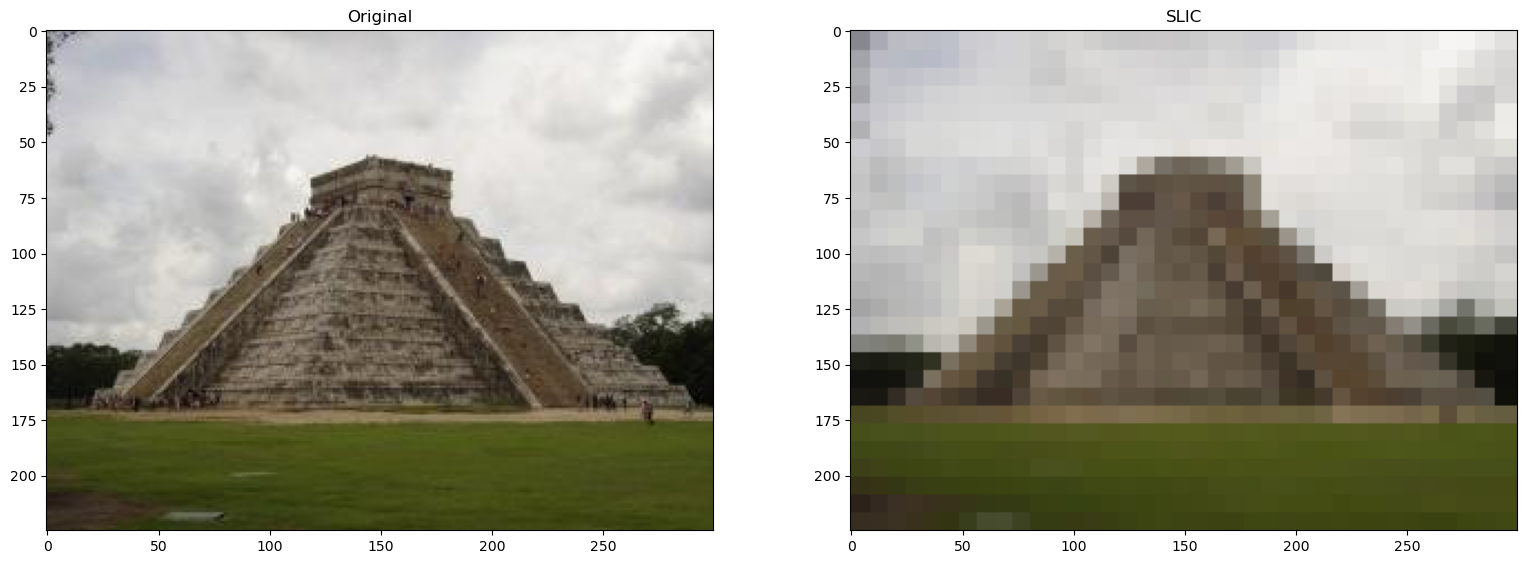

In [82]:
fig, ax = plt.subplots(1,2,figsize=(20,20))
plt.subplots_adjust(left=1,bottom=1,right=1.8,top=1.25, wspace=0.01, hspace=0.01)
ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(image_seg,cv.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[1].set_title('SLIC')
plt.show()

## Método Niblack & Método Sauvola

#### Método Niblack
El método Niblack es una técnica de umbralización adaptativa utilizada en el procesamiento de imágenes, especialmente útil en casos donde hay variaciones de iluminación dentro de la misma imagen. A diferencia de los métodos de umbralización global, que aplican un único valor de umbral a toda la imagen, Niblack calcula un umbral local para cada píxel basado en la media y la desviación estándar de los píxeles en su vecindad inmediata.

Desarrollado por W. Niblack en 1986, este método se utiliza comúnmente en la binarización de documentos, especialmente aquellos que son antiguos o están deteriorados, donde la calidad de la imagen puede variar significativamente de una región a otra. La idea principal detrás de Niblack es ajustar el umbral en función de las características locales de la imagen, permitiendo una separación más efectiva entre el fondo y el primer plano en áreas con diferentes condiciones de iluminación. Esto lo convierte en una herramienta poderosa en aplicaciones donde los métodos tradicionales fallan al lidiar con contrastes no uniformes.

#### Método Sauvola
Por otra parte el método Sauvola es particularmente efectiva para la binarización de documentos que presentan variaciones de iluminación o contraste. Fue desarrollado por Jaakko Sauvola en 2000 y es una mejora sobre el método de Niblack.

A diferencia de los métodos de umbralización global que aplican un único valor de umbral a toda la imagen, el método Sauvola calcula un umbral local para cada píxel en función de la media y la desviación estándar de los píxeles en su vecindad inmediata. Esto permite que el umbral se adapte a las condiciones locales de iluminación, mejorando la separación entre el texto (o primer plano) y el fondo, especialmente en documentos deteriorados o escaneados en condiciones subóptimas.

In [151]:
mex = cv.imread('letter2_original.png',cv.IMREAD_GRAYSCALE)
mexgt = cv.imread('letters2_groundt.png',cv.IMREAD_GRAYSCALE)
mexgt = mexgt[:554,:660]
mexgt = (mexgt == 255).astype(np.uint8)

In [167]:
thresh_sauvola = threshold_sauvola(mex, window_size=41, k=.8)
mex_sauvola = (mex > thresh_sauvola)*1

In [171]:
thresh_niblack = threshold_niblack(mex, window_size=59, k=.8)
mex_niblack = (mex > thresh_niblack)*1

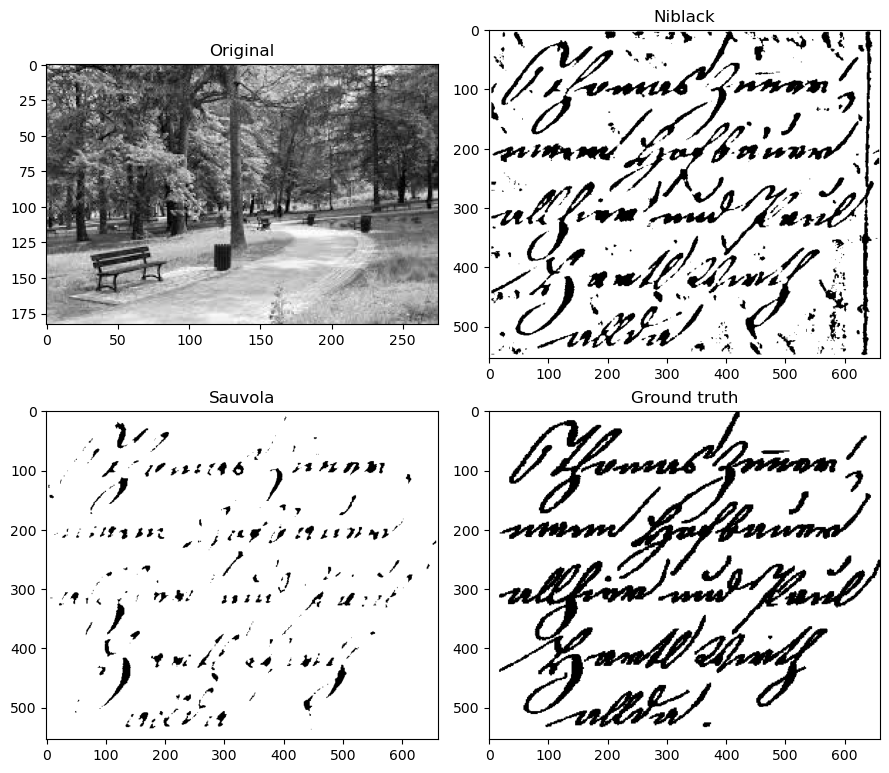

In [250]:
fig, ax = plt.subplots(2,2,figsize=(9,9))
#plt.subplots_adjust(left=1,bottom=1, wspace=0.01, hspace=0.01)
ax[0][0].imshow(cv.cvtColor(mex,cv.COLOR_BGR2RGB))
ax[0][1].imshow(mex_niblack,cmap=plt.cm.gray)
ax[1][0].imshow(mex_sauvola,cmap=plt.cm.gray)
ax[1][1].imshow(mexgt,cmap=plt.cm.gray)

ax[0][0].set_title('Original')
ax[0][1].set_title('Niblack')
ax[1][0].set_title('Sauvola')
ax[1][1].set_title('Ground truth')
plt.subplots_adjust(hspace=-0.4)
plt.tight_layout()
plt.show()

### Evaluación por el Índice de Similaridad de Dice (DSI)

$$ DSI =  2\frac{X \cap Y }{|X|+|Y|}$$

In [227]:
def dsi(image1, image2):
    image1 = image1 > 0
    image2 = image2 > 0
    intersection = np.sum(image1 & image2)
    sum_images = np.sum(image1) + np.sum(image2)
    if sum_images == 0:
        return 1.0  
    return 2.0 * intersection / sum_images

mexgtseg = (mexgtseg == 255).astype(np.uint8)
dsi = dice_similarity_coefficient(mexgt, mex_sauvola)
dsi2 = dice_similarity_coefficient(mexgt, mex_niblack)
print(f"Dice Similarity Index. Sauvola: {dsi:.4f}")
print(f"Dice Similarity Index. Niblack: {dsi2:.4f}")

Dice Similarity Index. Sauvola: 0.8916
Dice Similarity Index. Niblack: 0.8520


## Método Otsu

El método de Otsu se utiliza en diversas aplicaciones de visión por computadora y procesamiento de imágenes, como la segmentación de objetos en escenas complejas, la separación de texto del fondo en documentos, y la segmentación de regiones de interés en imágenes médicas. Es especialmente útil en escenarios donde la diferencia de intensidad entre el objeto y el fondo es clara, pero no es tan efectivo en imágenes con iluminación no uniforme o ruido significativo.

La simplicidad y la efectividad del método de Otsu lo convierten en una de las técnicas más populares para la segmentación de imágenes en contextos donde la separación entre fondo y objeto es un desafío central.

In [202]:
# Cargar la imagen y la ground truth
image = io.imread('images.jpg')
ground_truth = io.imread('images2.jpg')

In [203]:
# Convertir a escala de grises
gray_image = color.rgb2gray(image)
gray_ground_truth = color.rgb2gray(ground_truth)

In [204]:
# Redimensionar la ground truth para que coincida con el tamaño de la imagen
resized_ground_truth = transform.resize(gray_ground_truth, gray_image.shape, mode='reflect', anti_aliasing=True)

In [205]:
# Umbralización Otsu
ret, binary_image = cv2.threshold((gray_image * 255).astype(np.uint8), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
binary_image = binary_image / 255.0  # Normalizar a [0, 1]

In [215]:
# Crecimiento de regiones usando measure.label
labels = measure.label(binary_image, connectivity=2)
cleaned_labels = morphology.remove_small_objects(labels, min_size=500)

## Evaluación de Segmentaciones

In [224]:
def evaluate_segmentation(predicted, ground_truth):
    """ Evaluar la segmentación usando el Índice de Jaccard """
    intersection = np.logical_and(predicted, ground_truth)
    union = np.logical_or(predicted, ground_truth)
    iou = np.sum(intersection) / np.sum(union)
    return iou

## Convertir a binario para evaluación

In [225]:
binary_ground_truth = resized_ground_truth > 0.5

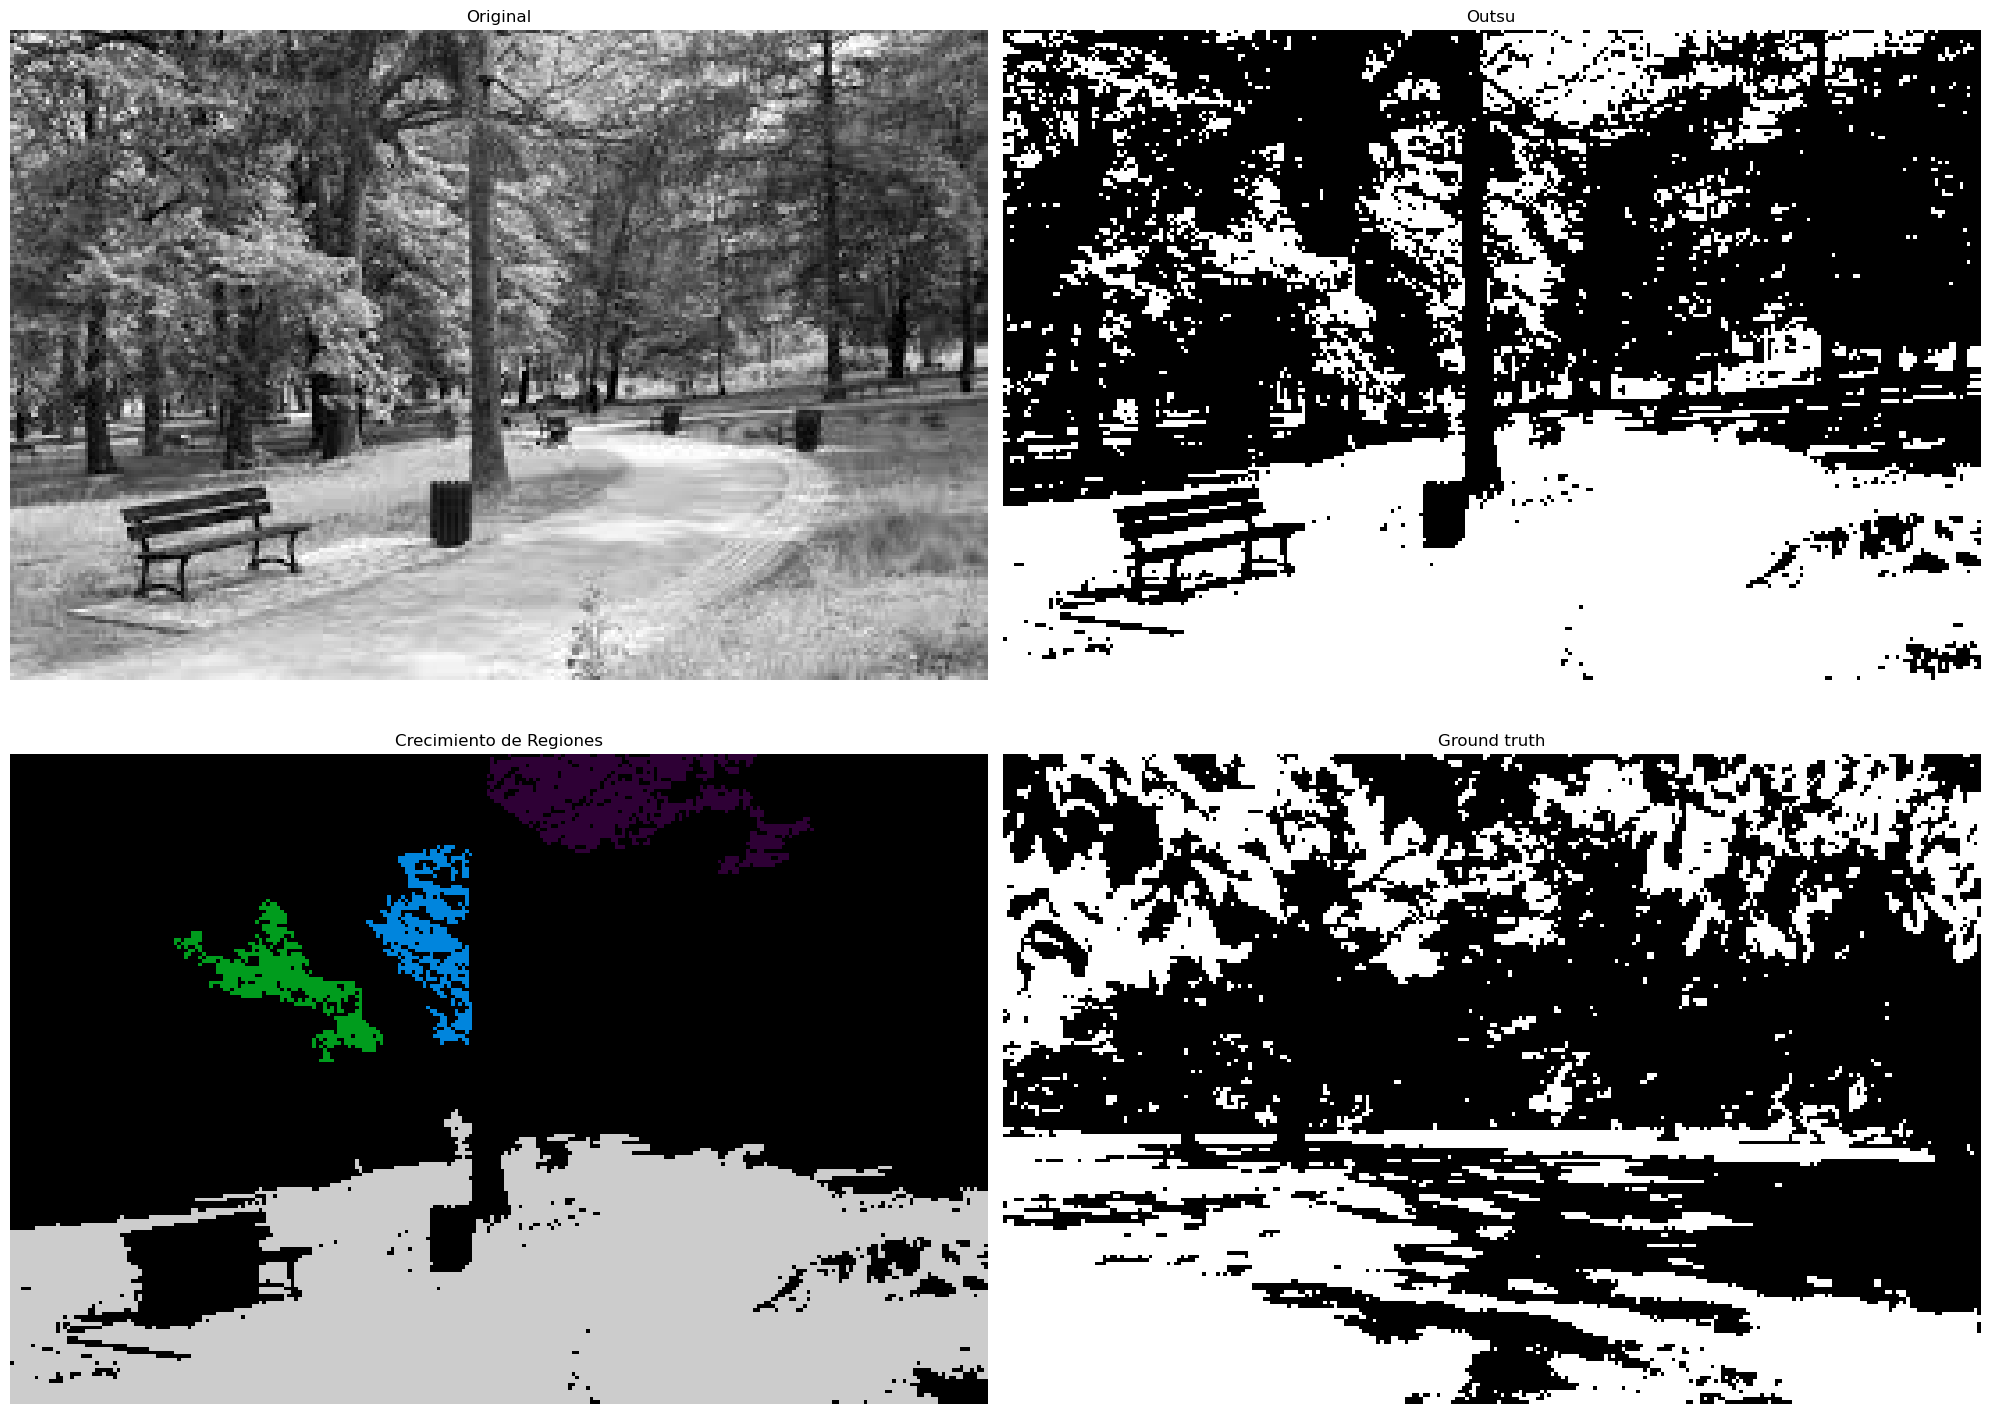

In [241]:
# Mostrar la imagen segmentada
fig, ax = plt.subplots(2,2,figsize=(20,20))
images = cv.imread('images.jpg',cv.IMREAD_GRAYSCALE)
gray_image = (gray_image == 255).astype(np.uint8)
ax[0][0].imshow(images,cmap='gray')
ax[0][1].imshow(binary_image,cmap='gray')
ax[1][0].imshow(cleaned_labels,cmap='nipy_spectral')
ax[1][1].imshow(binary_ground_truth,cmap='gray')
ax[0][0].set_title('Original')
ax[0][1].set_title('Outsu')
ax[1][0].set_title('Crecimiento de Regiones')
ax[1][1].set_title('Ground truth')
for ax in ax.flat:
    ax.axis('off')
plt.subplots_adjust(hspace=-0.5)
plt.tight_layout()
plt.show()

## Evaluar las segmentaciones

In [222]:
iou_score = evaluate_segmentation(binary_image > 0.5, binary_ground_truth)
print(f'Índice de Jaccard (IoU): {iou_score:.4f}')

Índice de Jaccard (IoU): 0.3636


## Referencias
1. Russell, B. C., Torralba, A., Murphy, K. P., & Freeman, W. T. (2008). LabelMe: A database and web-based tool for image annotation. International Journal of Computer Vision, 77(1-3), 157-173.
2. Yang, Z., Zuo, S., Zhou, Y., He, J., & Shi, J. (2024). A review of document binarization: Main techniques, new challenges, and trends. *Electronics, 13*(7), 1394. https://doi.org/10.3390/electronics13071394
3. Xing, J., Yang, P., & Qingge, L. (2020). Automatic thresholding using modified valley emphasis. *IET Image Processing, 14*. https://doi.org/10.1049/iet-ipr.2019.0176
4. IBM. (2024). ¿Qué es la segmentación de imágenes? https://www.ibm.com/mx-es/topics/image-segmentation